NAME
democrat      0.613793
republican    0.386207
Name: proportion, dtype: float64
NAME
democrat      0.610811
republican    0.389189
Name: proportion, dtype: float64
NAME
democrat      0.630769
republican    0.369231
Name: proportion, dtype: float64
Confusion Matrix:
 [[30 11]
 [ 2 22]]
Accuracy: 0.8
Incorrect Predictions:
            NAME   V1   V2   V3   V4   V5   V6   V7 V8 V9 V10  V11 V12  V13  \
372    democrat    n    y    y    y    y    y    n  n  n   n    y   y  NaN   
373    democrat    n    y    y  NaN    y    y    n  y  n   y  NaN   n    y   
375    democrat    n    y    n    y    y    y    n  n  n   n    y   y    n   
382    democrat    y    y    n    y    y    y    n  n  n   n    y   n    y   
384    democrat    y    y    y    y    y    y    n  n  n   n    y   y    y   
385    democrat    y    y    n    n    y    y    n  n  n   n    y   y    y   
388    democrat    n    y    y    y    y    y    n  n  n   n    n   y    y   
390    democrat  NaN  NaN    n    n  NaN    y  N

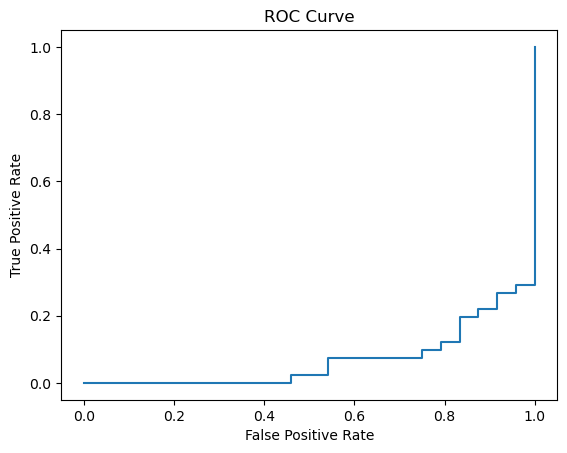

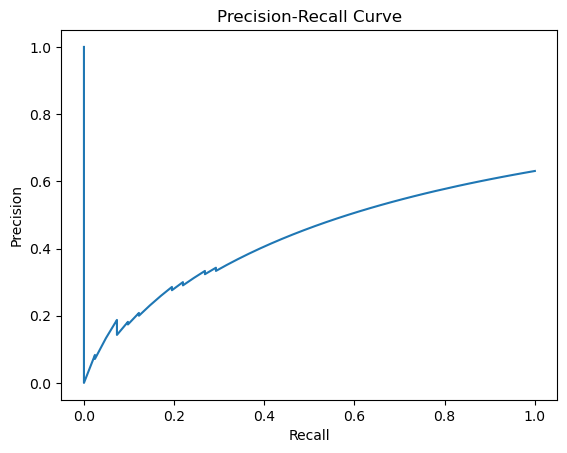

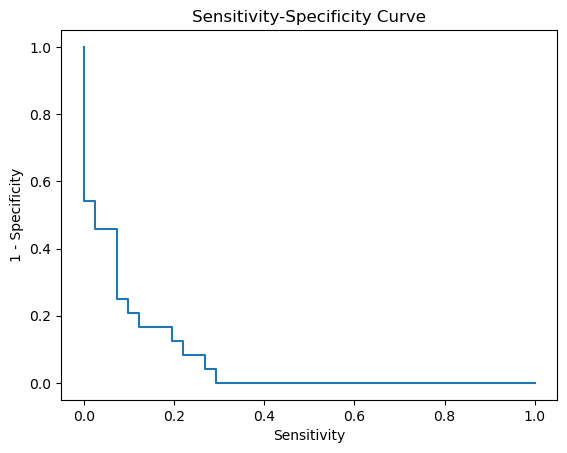

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
vote_data = pd.read_csv("house-votes-84.data", header=None)

# Nombrar columnas
header = ["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"]
vote_data.columns = header

# Reemplazar '?' con valores vacíos
vote_data.replace("?", np.nan, inplace=True)

# Convertir columna 'NAME' en variable categórica (Democrat o Republican)
vote_data['NAME'] = vote_data['NAME'].astype('category')

# Ver proporción de cada clase
print(vote_data['NAME'].value_counts(normalize=True))

# División de los datos en entrenamiento y prueba
vote_raw_train = vote_data.iloc[:370]
vote_raw_test = vote_data.iloc[370:]

# Verificar proporciones en cada conjunto
print(vote_raw_train['NAME'].value_counts(normalize=True))
print(vote_raw_test['NAME'].value_counts(normalize=True))

# Preparar datos para Naive Bayes
X_train = vote_raw_train.drop(columns=['NAME']).fillna("unknown")  # Llenamos NaN para tratar con datos desconocidos
X_test = vote_raw_test.drop(columns=['NAME']).fillna("unknown")

# Codificar categorías como numéricas
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.transform)

# Convertir la columna 'NAME' en valores numéricos
y_train = le.fit_transform(vote_raw_train['NAME'])
y_test = le.transform(vote_raw_test['NAME'])

# Entrenar modelo Naive Bayes
vote_classifier = MultinomialNB(alpha=1)
vote_classifier.fit(X_train, y_train)

# Predecir las clases
vote_test_pred = vote_classifier.predict(X_test)

# Matriz de confusión y precisión por clase
print("Confusion Matrix:\n", confusion_matrix(y_test, vote_test_pred))
print("Accuracy:", accuracy_score(y_test, vote_test_pred))

# Comparar predicciones incorrectas
incorrect_preds = vote_raw_test[y_test != vote_test_pred]
print("Incorrect Predictions:\n", incorrect_preds)

# Predicciones con probabilidades
vote_test_pred_proba = vote_classifier.predict_proba(X_test)
pred = pd.DataFrame(vote_test_pred_proba, columns=le.classes_)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, vote_test_pred_proba[:, 1], pos_label=le.classes_.tolist().index('democrat'))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, vote_test_pred_proba[:, 1], pos_label=le.classes_.tolist().index('democrat'))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Curva Sensitivity-Specificity
plt.plot(tpr, 1 - fpr, label='Sensitivity-Specificity Curve')
plt.xlabel('Sensitivity')
plt.ylabel('1 - Specificity')
plt.title('Sensitivity-Specificity Curve')
plt.show()
